In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
entrenamiento = pd.read_csv('train.csv')

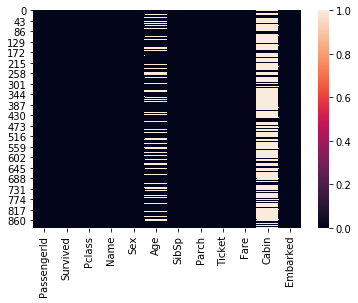

In [8]:
sns.heatmap(entrenamiento.isnull())

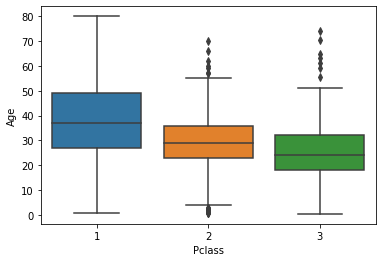

In [9]:
sns.boxplot(x='Pclass', y='Age', data=entrenamiento)

In [11]:
def edad_media(columnas):
	edad = columnas[0]
	clase = columnas[1]
	if pd.isnull(edad):
		if clase == 1:
			return 38
		elif clase == 2:
			return 30
		else:
			return 25
	else:
		return edad

In [12]:
entrenamiento['Age'] = entrenamiento[['Age','Pclass']].apply(edad_media, axis=1)


In [13]:
entrenamiento.drop('Cabin', axis=1, inplace=True)


In [18]:
entrenamiento.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


In [19]:
sexo = pd.get_dummies(entrenamiento['Sex'], drop_first=True)

entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

entrenamiento.drop('Sex', axis=1, inplace=True)

puerto = pd.get_dummies(entrenamiento['Embarked'], drop_first=True)

entrenamiento = pd.concat([entrenamiento, sexo], axis=1)

entrenamiento.drop('Embarked', axis=1, inplace=True)


In [21]:
y = entrenamiento['Survived']
x = entrenamiento.drop('Survived', axis=1)

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression()
modelo.fit(x_train, y_train)

prediccion = modelo.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, prediccion))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       178
           1       0.74      0.77      0.75        90

    accuracy                           0.83       268
   macro avg       0.81      0.82      0.81       268
weighted avg       0.83      0.83      0.83       268



C:\Users\Nata\Anaconda3\envs\datascience\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, prediccion)

array([[154,  24],
       [ 21,  69]], dtype=int64)